# 1. QUESTION
Note:

We use the daily historical sales data from previous lecture in this homework. (Use this link to download this dataset)
All figures must have title, label and legend.
Use both matplotlib and seaborn for this homerwork.

# 1.1. Exercise 1:
Randomly choose 3 shops, use one line plot figure to show the total turnover of them each month over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

In [73]:
sales_df = pd.read_csv('sales.csv')
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [74]:
# Randomly choose 3 shops
np.random.seed(1) #Luôn đảm bảo rằng mỗi lần chạy mã, các số ngẫu nhiên được tạo ra sẽ giống nhau.
random_shop_id = np.random.choice(sales_df.shop_id.unique(), size=3)
random_shop_id

array([52, 46,  4])

In [75]:
# Get data of three random shop_id
#isin: Trả ra các hàng có value giống với arr chuyền vào
random_shop_df = sales_df[np.isin(sales_df.shop_id, random_shop_id)]
random_shop_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
30072,12.01.2013,0,4,5605,489.3,1.0
30073,03.01.2013,0,4,5587,199.0,1.0
30074,27.01.2013,0,4,5588,149.0,1.0
30075,21.01.2013,0,4,5613,6190.0,1.0
30076,08.01.2013,0,4,5627,2390.0,1.0
...,...,...,...,...,...,...
2918122,28.10.2015,33,4,1586,5999.0,1.0
2918123,05.10.2015,33,4,1523,799.0,1.0
2918124,03.10.2015,33,4,1535,1999.0,1.0
2918125,01.10.2015,33,4,1325,449.0,1.0


In [76]:
# Group sale dataframe by `shop_id` and `date_block_num`
sales_group_shop_df = random_shop_df.groupby(by=['shop_id', 'date_block_num'])
sales_group_shop_df

In [77]:
def cal_turnover(grouped_df):
    '''
    Input: each grouped dataframe
    Output: Total turnover of each group
    '''
    price, num_items = grouped_df['item_price'], grouped_df['item_cnt_day']
    return np.sum(price * num_items)

In [78]:
# Apply `cal_turnover` function for each group
# Reset index to create new df
# Rename calculated value column as `total_turnover`
turnover_shop_df = sales_group_shop_df.apply(cal_turnover).reset_index(name='total_turnover')
turnover_shop_df
'''
lưu ý: Ta thấy bình thường hàm apply ta chỉ apply với cột và sẽ apply cho từng hàng trong cột, còn khi ta truyền vào hẳn
dataframe là vì hàm ta dùng là truyền hẳn dataframe vào hàm nên nó sẽ apply đc như thế
'''

'\nlưu ý: Ta thấy bình thường hàm apply ta chỉ apply với cột và sẽ apply cho từng hàng trong cột, còn khi ta truyền vào hẳn\ndataframe là vì hàm ta dùng là truyền hẳn dataframe vào hàm nên nó sẽ apply đc như thế\n'

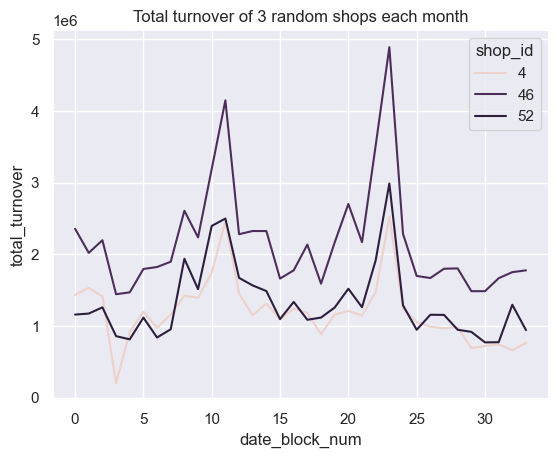

In [79]:
# Plot the figure
sns.lineplot(x='date_block_num', 
             y='total_turnover', 
             hue='shop_id', 
             data=turnover_shop_df)
plt.title('Total turnover of 3 random shops each month')
plt.show();

# 2.2. Exercise 2:
Randomly choose 1 item, use one combo figure with bar plot and line plot to show the sales and the turnover of it over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [80]:
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [81]:
# Randomly choose 1 item
np.random.seed(1)
random_item_id = np.random.choice(sales_df.item_id.unique(), size=1)
random_item_id

array([970])

In [82]:
# Get data of the random item_id
random_item_df = sales_df[sales_df.item_id == random_item_id[0]]
random_item_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
636,02.01.2013,0,25,970,279.0,1.0
2394,08.01.2013,0,24,970,279.0,1.0
2395,26.01.2013,0,24,970,279.0,1.0
10043,12.01.2013,0,19,970,279.0,1.0
13269,27.01.2013,0,21,970,279.0,1.0
...,...,...,...,...,...,...
2890056,28.10.2015,33,35,970,331.0,1.0
2892229,03.10.2015,33,38,970,349.0,1.0
2902698,15.10.2015,33,49,970,349.0,1.0
2908977,17.10.2015,33,16,970,349.0,1.0


In [83]:
# Group sale dataframe by `date_block_num`
sales_group_date_df = random_item_df.groupby(by=['date_block_num'])
sales_group_date_df

In [84]:
# Use `agg` to calcuate number of item each date_block_num
sales_item_df = sales_group_date_df.agg({'item_cnt_day': sum}).reset_index()
sales_item_df

,date_block_num,item_cnt_day
0,0,14.0
1,1,6.0
2,2,27.0
3,3,21.0
4,4,27.0
5,5,30.0
6,6,22.0
7,7,5.0
8,8,9.0
9,9,1.0


In [85]:
turnover_item_df = sales_group_date_df.apply(cal_turnover).reset_index(name='total_turnover')
turnover_item_df

,date_block_num,total_turnover
0,0,3906.00
1,1,1556.00
2,2,7533.00
3,3,5859.00
4,4,7533.00
5,5,8370.00
6,6,6020.00
7,7,1395.00
8,8,2511.00
9,9,279.00


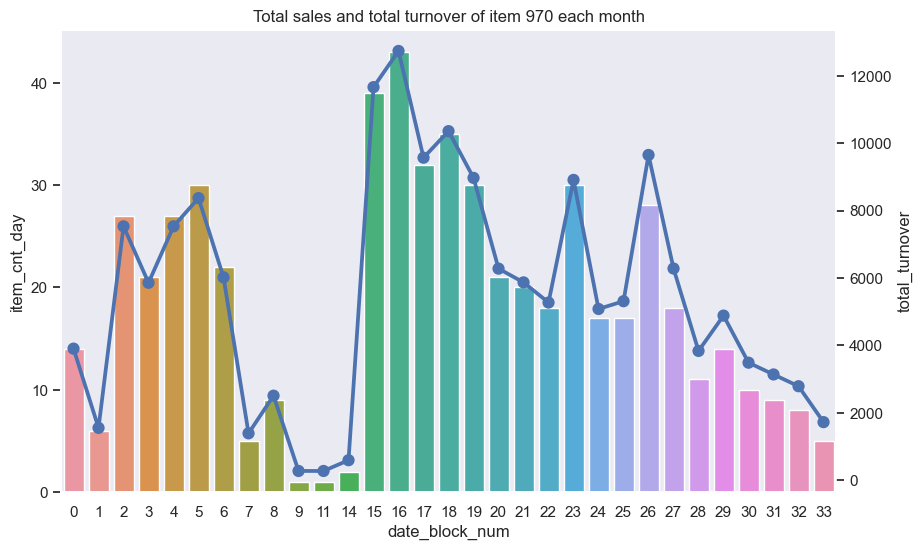

In [86]:
# Plot the figure
sns.set_style('dark')
fig, ax_1 = plt.subplots(figsize=(10, 6))
ax_2 = ax_1.twinx()
sns.barplot(ax=ax_1, 
            x='date_block_num', 
            y='item_cnt_day', 
            data=sales_item_df)
sns.pointplot(ax=ax_2, 
              x='date_block_num', 
              y='total_turnover', 
              data=turnover_item_df)

plt.title(f'Total sales and total turnover of item {random_item_id[0]} each month')
plt.show()

# 2.3. Exercise 3:
Randomly choose 3 items, use one bar plot figure to show the sales of them in 3 years 2013, 2014, and 2015.

In [87]:
# Randomly choose 3 items
np.random.seed(0)
random_item_id = np.random.choice(sales_df.item_id.unique(), size=3)
random_item_id

array([11484, 15044, 16718])

In [88]:
# Process `date` to get the year
new_date_sales_df = sales_df.copy()
new_date_sales_df['date'] = new_date_sales_df.date.apply(lambda x: x.split('.')[-1])
new_date_sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013,0,59,22154,999.00,1.0
1,2013,0,25,2552,899.00,1.0
2,2013,0,25,2552,899.00,-1.0
3,2013,0,25,2554,1709.05,1.0
4,2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015,33,25,7409,299.00,1.0
2935845,2015,33,25,7460,299.00,1.0
2935846,2015,33,25,7459,349.00,1.0
2935847,2015,33,25,7440,299.00,1.0


In [89]:
# Get data of the random item_ids
random_item_df = new_date_sales_df[np.isin(new_date_sales_df.item_id, random_item_id)]
random_item_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
6770,2013,0,25,11484,149.0,1.0
6771,2013,0,25,11484,149.0,1.0
10734,2013,0,19,11484,149.0,2.0
10735,2013,0,19,11484,149.0,1.0
16190,2013,0,28,11484,149.0,1.0
...,...,...,...,...,...,...
2837562,2015,32,38,15044,298.0,1.0
2843132,2015,32,57,11484,99.0,1.0
2847676,2015,32,51,11484,90.0,1.0
2868766,2015,32,31,11484,99.0,1.0


In [90]:
# Group by `date` and `item_id` to get item_count each year
grouped_item_df = random_item_df.groupby(by=['date', 'item_id']).agg({'item_cnt_day': sum})
grouped_item_df = grouped_item_df.reset_index()
grouped_item_df

,date,item_id,item_cnt_day
0,2013,11484,653.0
1,2013,15044,4988.0
2,2013,16718,1.0
3,2014,11484,173.0
4,2014,15044,661.0
5,2015,11484,99.0
6,2015,15044,75.0


In [91]:
def fill_missing_value(df, year_list):
    for year in year_list:
        if len(df[df.date == year]) == 0: # Nếu không có hàng nào, điều này cho thấy dữ liệu cho năm đó bị thiếu.
            data={
                'date': year,
                'item_id': df.item_id.values[0], # Trả về giá trị đầu tiên trong cột "item_id"
                'item_cnt_day': 0
            }
            df = df.append(data, ignore_index=True)
    df = df.sort_values(by='date')
    return df

In [92]:
year_list = ['2013', '2014', '2015']
#x_axis = np.arange(len(year_list)).astype(float)

new_df_list = []
for index, item_id in enumerate(random_item_id):
    df = grouped_item_df[grouped_item_df.item_id == item_id]  # Tách ra 3 DF theo từng năm
    #print("df:",df)
    df = fill_missing_value(df, year_list)
    new_df_list.append(df)

new_df = pd.concat(new_df_list).reset_index()
new_df

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
grouped_item_df

# 2.4. Exercise 4:
Randomly choose 1 shop, use stack plot figure to show the contribution of turnover of each item each month over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [93]:
# Randomly choose 1 shop
np.random.seed(2)
random_shop_id = np.random.choice(sales_df.shop_id.unique(), size=1)
random_shop_id

array([38])

In [94]:
# Get data of random shop_id
random_shop_df = new_date_sales_df[np.isin(new_date_sales_df.shop_id, random_shop_id)]
random_shop_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
102088,2013,0,38,22154,999.0,1.0
102089,2013,0,38,22151,399.0,1.0
102090,2013,0,38,22134,399.0,1.0
102091,2013,0,38,22134,399.0,1.0
102092,2013,0,38,22134,399.0,1.0
...,...,...,...,...,...,...
2893353,2015,33,38,20367,1899.0,1.0
2893354,2015,33,38,20393,1999.0,1.0
2893355,2015,33,38,20405,2399.0,1.0
2893356,2015,33,38,20428,1599.0,1.0


In [95]:
# Group sale dataframe by `item_id` and `date_block_num`
sales_group_shop_df = random_shop_df.groupby(by=['item_id', 'date_block_num'])
# Apply `cal_turnover` function for each group
# Reset index to create new df
# Rename calculated value column as `total_turnover`
sales_group_shop_df = sales_group_shop_df.apply(cal_turnover).reset_index(name='total_turnover')
sales_group_shop_df

,item_id,date_block_num,total_turnover
0,28,2,398.0
1,30,1,3192.0
2,30,2,798.0
3,30,7,399.0
4,30,11,169.0
...,...,...,...
26104,22167,18,299.0
26105,22167,19,299.0
26106,22167,21,598.0
26107,22167,27,598.0


In [96]:
temp_group_df = sales_group_shop_df.groupby(by='item_id')
temp_group_df

In [100]:
new_data = dict()

for group in temp_group_df:   # Lọc ra các df đã được groupby theo item_id
    #print("group: ", group)
    if len(group[1]) == 34:
#          print(group[0])
        new_data[group[0]] = group[1].total_turnover.values
        
new_data

{3076: array([ 6994.5 ,  7871.36,  4653.4 ,  4595.  ,   799.  ,  1598.  ,
         1598.  ,  6072.48,  1598.  ,  2397.  ,  2397.  ,  3196.  ,
         6392.  ,  6005.63,  2397.  ,  3196.  ,  3036.  ,  2317.  ,
         1598.  ,  5637.44,  4516.19,  3995.  ,  4794.  , 10307.1 ,
         3596.  ,  2398.  ,  7194.  ,  2398.  ,  2398.  ,  3597.  ,
         4796.  ,  1199.  ,  3596.5 ,  2398.  ]),
 7894: array([ 5214.5,  5662. ,  8642. ,  2980. ,  1490. ,  5960. ,  5960. ,
         5661.8,  4470. , 11920. ,  4470. ,  7449.5,  7450. ,  7350. ,
         2501.6,  4370. ,  1490. ,  1390. ,  9930. ,  8540. ,  5960. ,
         4870. ,  3480. ,  3880. ,  1890. ,  8460. ,  2190. ,  6870. ,
         6870. ,  4580. ,  6870. ,  6570. ,  4580. ,  2290. ]),
 17717: array([  695.        ,  3990.        ,  7831.        ,  5195.        ,
         2735.        ,  1444.        ,   498.        ,   907.        ,
          300.        ,  1497.        ,   619.        ,  1157.        ,
          299.        ,  20

In [101]:
new_df = pd.DataFrame(data=new_data)
new_df

,3076,7894,17717
0,6994.50,5214.5,695.0
1,7871.36,5662.0,3990.0
2,4653.40,8642.0,7831.0
3,4595.00,2980.0,5195.0
4,799.00,1490.0,2735.0
5,1598.00,5960.0,1444.0
6,1598.00,5960.0,498.0
7,6072.48,5661.8,907.0
8,1598.00,4470.0,300.0
9,2397.00,11920.0,1497.0


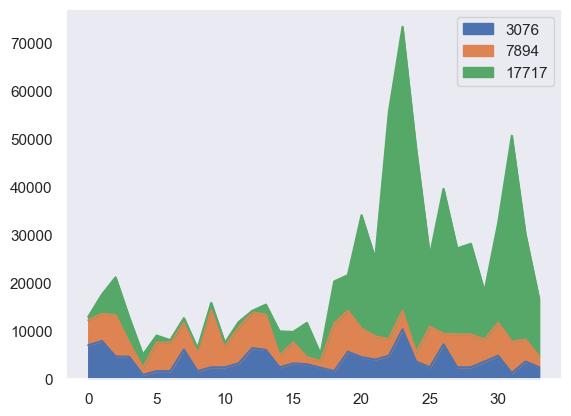

In [102]:
new_df.plot.area()
plt.show()

# 2.5. Exercise 5:
Randomly choose 1 shop, use pie plot figure to show the contribution of turnover (in percent) of each item in 3 years 2013, 2014, and 2015. (1 pie plot figure for each year, use subplots to put all 3 figures together)

In [104]:
item_id_list = list(new_df.columns)
new_df

,3076,7894,17717
0,6994.50,5214.5,695.0
1,7871.36,5662.0,3990.0
2,4653.40,8642.0,7831.0
3,4595.00,2980.0,5195.0
4,799.00,1490.0,2735.0
5,1598.00,5960.0,1444.0
6,1598.00,5960.0,498.0
7,6072.48,5661.8,907.0
8,1598.00,4470.0,300.0
9,2397.00,11920.0,1497.0


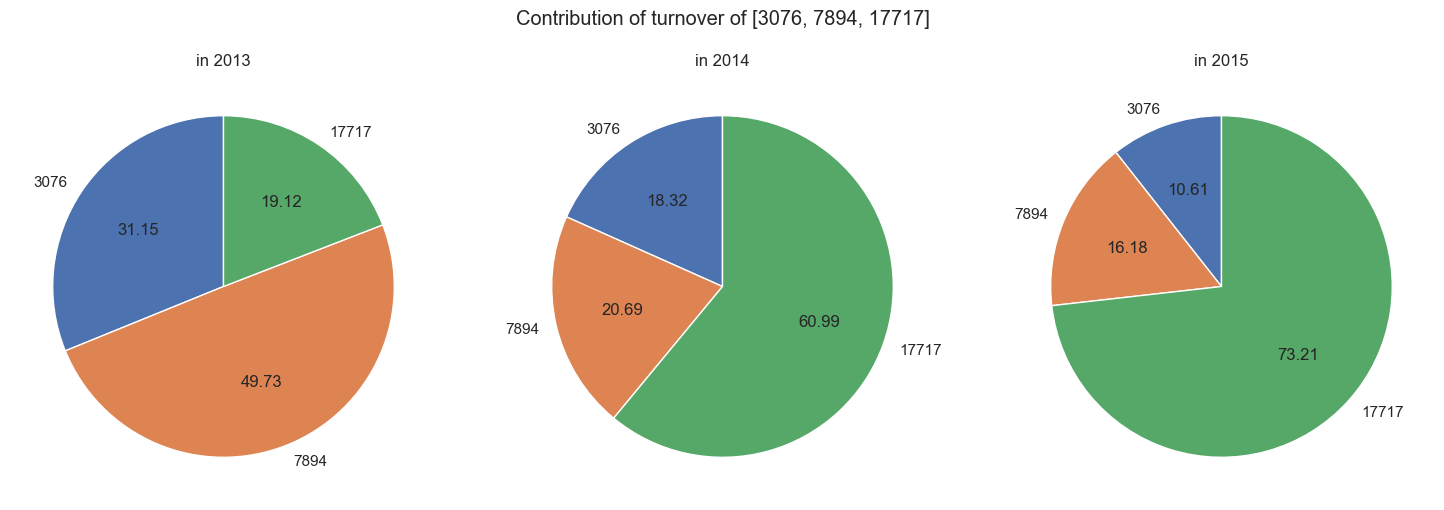

In [105]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

new_df[:12].sum().plot(ax=ax[0],            # Năm 2013
                       kind='pie', 
                       startangle=90, 
                       autopct='%.2f', 
                       title='in 2013', 
                       ylabel=''
                      ) 
new_df[12:24].sum().plot(ax=ax[1],          # Năm 2014
                         kind='pie', 
                         startangle=90, 
                         autopct='%.2f', 
                         title='in 2014', 
                         ylabel=''
                        ) 
new_df[24:].sum().plot(ax=ax[2],            # Năm 2015
                       kind='pie', 
                       startangle=90, 
                       autopct='%.2f', 
                       title='in 2015', 
                       ylabel='') 

plt.suptitle(f'Contribution of turnover of {item_id_list}', 
             horizontalalignment='center', 
             verticalalignment='bottom')
plt.tight_layout()
plt.show();

# Body parts of Penguin

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = sns.load_dataset('penguins')
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# I. Tiền xử lý dữ liệu (Data Preprocessing)

Sử dụng hàm .describes() để xem các đặc trưng của dữ liệu, hãy viết ra nhận xét của bạn (dưới dạng Markdown)

Sử dụng hàm info() để xem các đặc trưng của dữ liệu, hãy viết ra nhận xét của bạn (dưới dạng Markdown)

Sử dụng hàm .value_counts() cho cột "species" để đếm số lượng cá thể của mỗi loài.

Vẽ biểu đồ boxplot với cột x là "species", cột y là "bill_depth_mm", đưa ra nhận xét của bạn (dưới dạng Markdown)

Vẽ biểu đồ violinplot với cột x là "species", cột y là "bill_length_mm", đưa ra nhận xét của bạn (dưới dạng Markdown)

Sử dụng hàm .describes() để xem các đặc trưng của dữ liệu, hãy viết ra nhận xét của bạn (dưới dạng Markdown)


In [3]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Sử dụng hàm info() để xem các đặc trưng của dữ liệu, hãy viết ra nhận xét của bạn (dưới dạng Markdown)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3 Sử dụng hàm .value_counts() cho cột "species" để đếm số lượng cá thể của mỗi loài.

In [8]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

4 Vẽ biểu đồ boxplot với cột x là "species", cột y là "bill_depth_mm", đưa ra nhận xét của bạn (dưới dạng Markdown)



<Axes: xlabel='species', ylabel='bill_depth_mm'>

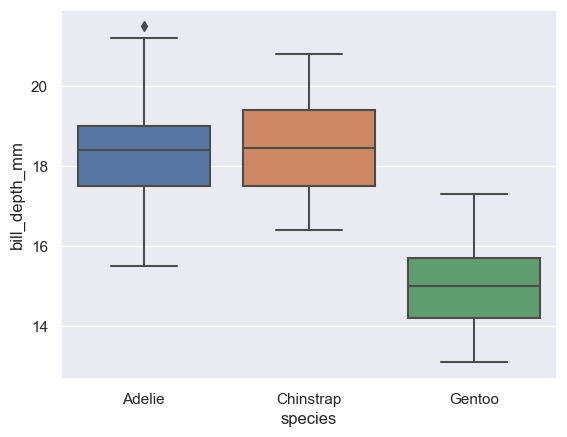

In [9]:
sns.boxplot(data = df, x = 'species', y = 'bill_depth_mm')

Độ sâu của mỏ chim cánh cụt loài Adelie và Chinstrap có độ sâu khá giống nhau, độ sâu trung bình bằng nhau(khoảng 18,3), tuy nhiên loài Chinstrap có những con có độ sâu cao hơn so với loài Adelie, Còn loài Gentoo độ sâu khá thấp (Trung bình khoảng 15mm)

5 Vẽ biểu đồ violinplot với cột x là "species", cột y là "bill_length_mm", đưa ra nhận xét của bạn (dưới dạng Markdown)



<Axes: xlabel='species', ylabel='bill_length_mm'>

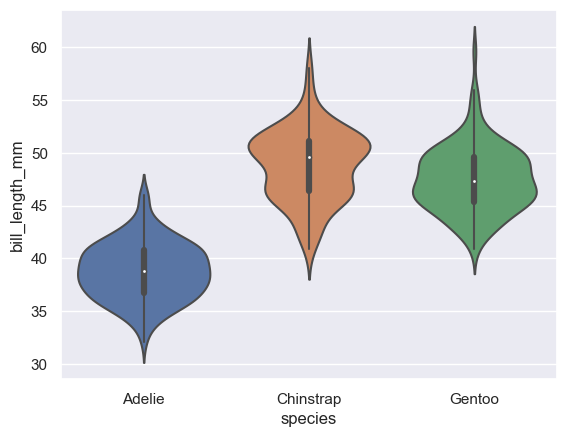

In [10]:
sns.violinplot(data = df, x = 'species', y = 'bill_length_mm')

# 2. Chuẩn bị dữ liệu (Prepare Data)

1. Sử dụng hàm .drop loại bỏ các cột 'sex', 'island', 'flipper_length_mm', 'body_mass_g'. In ra dataframe mới, đặt tên là df_dataset

2. Sử dụng .dropna() để loại bỏ các hàng chứa giá trị rỗng (null) trong df_dataset
3. Thêm một cột mới có tên "is_Adelie" vào df_dataset, sao cho giá trị nào ở cột "species" là "Adelie" thì giá trị cột đó là "True", giá trị không phải "Adelie" thì giá trị trong cột đó là "False".
4. Từ dataframe ban đầu, tách ra 2 dataframe mới: một df tên "df_Adelie" mà trong đó cột "species" chứa toàn giá trị True, 1 df tên "df_not_Adelie" mà trong đó cột "species" chưa toàn giá trị False
5. Sử dụng công thức được cung cấp để cân bằng số phần từ của 2 df
6. Sử dụng hàm .concat() để ghép 2 dataframe trên thành 1 dataframe mới, đặt tên là df_learning
7. Sử dụng công thức được cung cấp để vẽ tương quan giữa 2 thuộc tính (bill_length_mm và bill_depth_mm) với việc cá thể là Adelie hay không phải Adelie
8. Từ df_learning, tách riêng dữ liệu 2 cột 'bill_length_mm' và 'bill_depth_mm' ra thành 1 df mới, đặt tên là X. Bạn hãy in X ra.
9. Từ df_learning, tách riêng dữ liệu cột 'is_Adelie', đặt tên là y. Bạn hãy in y ra

In [12]:
df_dataset = df.drop(columns = ['sex', 'island', 'flipper_length_mm', 'body_mass_g'])
df_dataset

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,NaN,NaN
4,Adelie,36.7,19.3
...,...,...,...
339,Gentoo,NaN,NaN
340,Gentoo,46.8,14.3
341,Gentoo,50.4,15.7
342,Gentoo,45.2,14.8


In [14]:
df_dataset = df_dataset.dropna(axis = 0 )
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         342 non-null    object 
 1   bill_length_mm  342 non-null    float64
 2   bill_depth_mm   342 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.7+ KB


In [18]:
df_dataset['is_Adelie'] = df_dataset['species'].apply(lambda x: 'True' if x == 'Adelie' else 'False')
df_dataset

,species,bill_length_mm,bill_depth_mm,is_Adelie
0,Adelie,39.1,18.7,True
1,Adelie,39.5,17.4,True
2,Adelie,40.3,18.0,True
4,Adelie,36.7,19.3,True
5,Adelie,39.3,20.6,True
...,...,...,...,...
338,Gentoo,47.2,13.7,False
340,Gentoo,46.8,14.3,False
341,Gentoo,50.4,15.7,False
342,Gentoo,45.2,14.8,False


4 Từ df_dataset ban đầu, tách ra 2 dataframe mới: một df tên df_Adelie mà trong đó cột "species" chứa toàn giá trị True, 1 df tên df_not_Adelie mà trong đó cột "species" chưa toàn giá trị False



In [20]:
df_Adelie = df_dataset[df_dataset['is_Adelie'] == 'True']
df_Adelie

,species,bill_length_mm,bill_depth_mm,is_Adelie
0,Adelie,39.1,18.7,True
1,Adelie,39.5,17.4,True
2,Adelie,40.3,18.0,True
4,Adelie,36.7,19.3,True
5,Adelie,39.3,20.6,True
...,...,...,...,...
147,Adelie,36.6,18.4,True
148,Adelie,36.0,17.8,True
149,Adelie,37.8,18.1,True
150,Adelie,36.0,17.1,True


In [21]:
df_not_Adelie = df_dataset[df_dataset['is_Adelie'] == 'False']
df_not_Adelie

,species,bill_length_mm,bill_depth_mm,is_Adelie
152,Chinstrap,46.5,17.9,False
153,Chinstrap,50.0,19.5,False
154,Chinstrap,51.3,19.2,False
155,Chinstrap,45.4,18.7,False
156,Chinstrap,52.7,19.8,False
...,...,...,...,...
338,Gentoo,47.2,13.7,False
340,Gentoo,46.8,14.3,False
341,Gentoo,50.4,15.7,False
342,Gentoo,45.2,14.8,False


5 Sử dụng công thức sau để cân bằng số phần từ của 2 df



In [22]:
df_not_Adelie = df_not_Adelie.sample(
    151, random_state=1)
df_not_Adelie

,species,bill_length_mm,bill_depth_mm,is_Adelie
183,Chinstrap,54.2,20.8,False
218,Chinstrap,50.8,19.0,False
265,Gentoo,43.6,13.9,False
306,Gentoo,43.4,14.4,False
233,Gentoo,48.4,14.6,False
...,...,...,...,...
176,Chinstrap,46.7,17.9,False
155,Chinstrap,45.4,18.7,False
313,Gentoo,49.5,16.1,False
201,Chinstrap,49.8,17.3,False


6 Sử dụng hàm .concat() để ghép 2 dataframe trên thành 1 dataframe mới, đặt tên là df_learning



In [25]:
df_learning = pd.concat([df_not_Adelie,df_Adelie],axis=0, ignore_index=True)
df_learning

,species,bill_length_mm,bill_depth_mm,is_Adelie
0,Chinstrap,54.2,20.8,False
1,Chinstrap,50.8,19.0,False
2,Gentoo,43.6,13.9,False
3,Gentoo,43.4,14.4,False
4,Gentoo,48.4,14.6,False
...,...,...,...,...
297,Adelie,36.6,18.4,True
298,Adelie,36.0,17.8,True
299,Adelie,37.8,18.1,True
300,Adelie,36.0,17.1,True


7 Sử dụng công thức sau để vẽ tương quan giữa 2 thuộc tính (bill_length_mm và bill_depth_mm) với việc cá thể là Adelie hay không phải Adelie



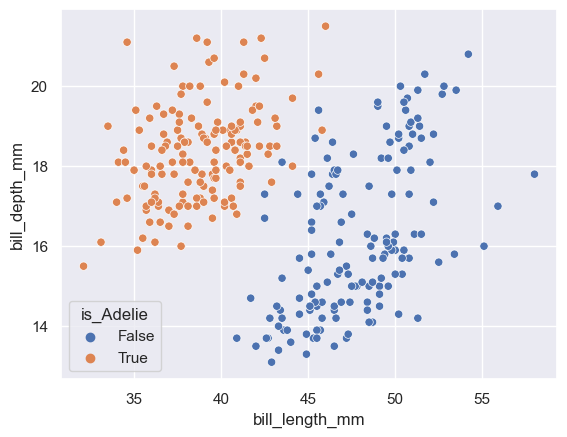

In [26]:
sns.scatterplot(data=df_learning, x='bill_length_mm', y='bill_depth_mm', hue='is_Adelie')
plt.show()

8. Từ df_learning, tách riêng dữ liệu 2 cột 'bill_length_mm' và 'bill_depth_mm' ra thành 1 df mới, đặt tên là X. Bạn hãy in X ra



In [29]:
X = df_learning[['bill_length_mm','bill_depth_mm']]
X

,bill_length_mm,bill_depth_mm
0,54.2,20.8
1,50.8,19.0
2,43.6,13.9
3,43.4,14.4
4,48.4,14.6
...,...,...
297,36.6,18.4
298,36.0,17.8
299,37.8,18.1
300,36.0,17.1


In [31]:
y = df_learning['is_Adelie']
y

0      False
1      False
2      False
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: is_Adelie, Length: 302, dtype: object

# 3. Xây dựng Model (Build Model)

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(fit_intercept=True)
model

LogisticRegression()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [35]:
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)
y_pred.shape

(61,)